In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Can we predict who is going to terminate 

In [28]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [29]:
data = pd.read_csv('HRDataset.csv')

In [30]:
data.shape

(311, 36)

In [31]:
pd.set_option('max_columns', 36)
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [32]:
data = data.drop(['Employee_Name', 'DOB','ManagerName','DateofHire','DateofTermination','LastPerformanceReview_Date','HispanicLatino'
                ,'RaceDesc','TermReason','ManagerID' ], axis = 1)

In [33]:
data.shape

(311, 26)

In [34]:
data.isnull().sum().sum()

0

In [35]:
data['EmploymentStatus'].value_counts()

Active                    207
Voluntarily Terminated     88
Terminated for Cause       16
Name: EmploymentStatus, dtype: int64

In [36]:
data.select_dtypes('object').head(3)

,Position,State,Sex,MaritalDesc,CitizenDesc,EmploymentStatus,Department,RecruitmentSource,PerformanceScore
0,Production Technician I,MA,M,Single,US Citizen,Active,Production,LinkedIn,Exceeds
1,Sr. DBA,MA,M,Married,US Citizen,Voluntarily Terminated,IT/IS,Indeed,Fully Meets
2,Production Technician II,MA,F,Married,US Citizen,Voluntarily Terminated,Production,LinkedIn,Fully Meets


In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


data['Department'] = le.fit_transform(data['Department'])
data['RecruitmentSource'] = le.fit_transform(data['RecruitmentSource'])
data['PerformanceScore'] = le.fit_transform(data['PerformanceScore'])
data['Position'] = le.fit_transform(data['Position'])
data['State'] = le.fit_transform(data['State'])
data['Sex'] = le.fit_transform(data['Sex'])
data['MaritalDesc'] = le.fit_transform(data['MaritalDesc'])
data['CitizenDesc'] = le.fit_transform(data['CitizenDesc'])




# lets again check whether there any Object Data Type Columns are Left
data.select_dtypes('object').columns

Index(['EmploymentStatus'], dtype='object')

In [43]:
data.drop(data[data['EmploymentStatus'] =='Terminated for Cause'].index, inplace = True)

In [44]:
data['EmploymentStatus'].value_counts()

Active                    207
Voluntarily Terminated     88
Name: EmploymentStatus, dtype: int64

In [45]:
from imblearn.combine import SMOTEENN

# defining the Model
sn = SMOTEENN(random_state = 0)

# Training the Model
sn.fit(x, y)

# Making the Samples
x, y = sn.fit_resample(x, y)

# Class Distribution
y.value_counts()

Voluntarily Terminated    92
Terminated for Cause      86
Active                    84
Name: EmploymentStatus, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("Shape of xtrain: ", x_train.shape)
print("Shape of xtest: ", x_test.shape)
print("Shape of ytrain :", y_train.shape)
print("Shape of ytest :", y_test.shape)

Shape of xtrain:  (209, 25)
Shape of xtest:  (53, 25)
Shape of ytrain : (209,)
Shape of ytest : (53,)


In [47]:
# Lets create a Predictive Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

cr = classification_report(y_pred, y_test)
print(cr)

                        precision    recall  f1-score   support

                Active       1.00      1.00      1.00        15
  Terminated for Cause       1.00      1.00      1.00        18
Voluntarily Terminated       1.00      1.00      1.00        20

              accuracy                           1.00        53
             macro avg       1.00      1.00      1.00        53
          weighted avg       1.00      1.00      1.00        53



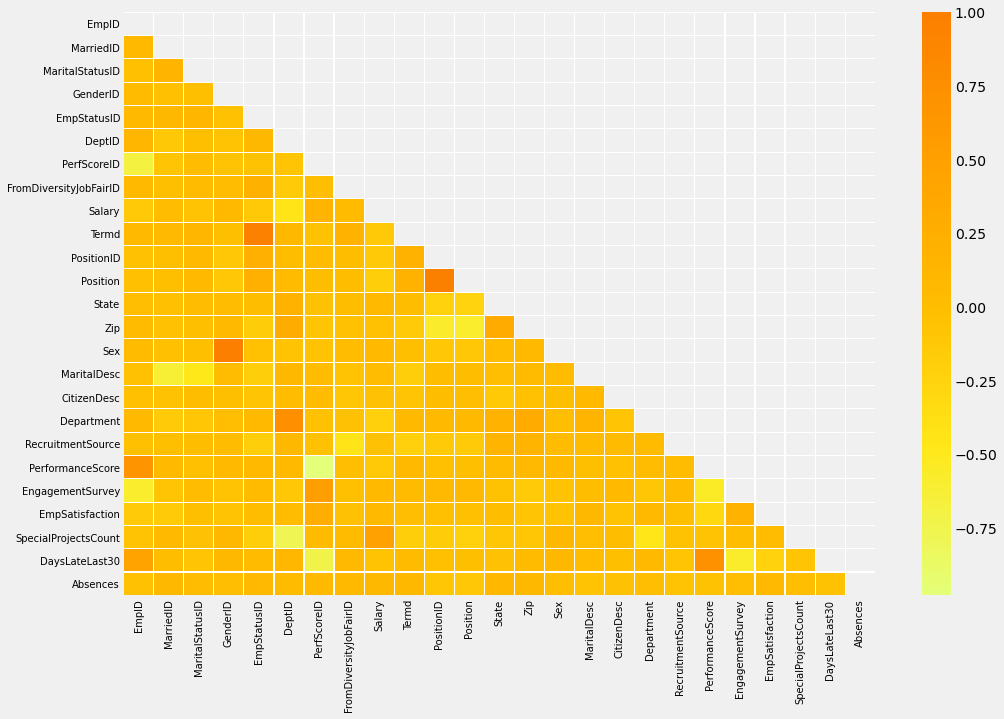

In [48]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('fivethirtyeight')

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, cmap = 'Wistia', linewidths = 0.2)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [51]:
# Lets Remove the Highly Correlated Columns from the Datasets

data_cf = data.drop(['Sex'], axis = 1)

# lets check the shape of the dataset after removal of 5 Columns from 35 Columns
data_cf.shape

(295, 25)

In [52]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


data['Department'] = le.fit_transform(data['Department'])
data['RecruitmentSource'] = le.fit_transform(data['RecruitmentSource'])
data['PerformanceScore'] = le.fit_transform(data['PerformanceScore'])
data['Position'] = le.fit_transform(data['Position'])
data['State'] = le.fit_transform(data['State'])
data['Sex'] = le.fit_transform(data['Sex'])
data['MaritalDesc'] = le.fit_transform(data['MaritalDesc'])
data['CitizenDesc'] = le.fit_transform(data['CitizenDesc'])




# lets again check whether there any Object Data Type Columns are Left
data.select_dtypes('object').columns

Index(['EmploymentStatus'], dtype='object')

In [53]:
# Now, Split the Dataset

y_cf = data_cf['EmploymentStatus']
x_cf = data_cf.drop(['EmploymentStatus'], axis = 1)

In [54]:
from imblearn.combine import SMOTEENN

# defining the Model
sn = SMOTEENN(random_state = 0)

# Training the Model
sn.fit(x_cf, y_cf)

# Making the Samples
x_cf, y_cf = sn.fit_resample(x_cf, y_cf)

# Class Distribution
y_cf.value_counts()

Voluntarily Terminated    52
Active                    46
Name: EmploymentStatus, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split

x_train_cf, x_test_cf, y_train_cf, y_test_cf = train_test_split(x_cf, y_cf, test_size = 0.2, random_state = 0)

print("Shape of xtrain: ", x_train_cf.shape)
print("Shape of xtest: ", x_test_cf.shape)
print("Shape of ytrain :", y_train_cf.shape)
print("Shape of ytest :", y_test_cf.shape)

Shape of xtrain:  (78, 24)
Shape of xtest:  (20, 24)
Shape of ytrain : (78,)
Shape of ytest : (20,)


In [56]:
# Lets create a Predictive Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()
model.fit(x_train_cf, y_train_cf)
y_pred_cf = model.predict(x_test_cf)

cr = classification_report(y_pred_cf, y_test_cf)
print(cr)

                        precision    recall  f1-score   support

                Active       1.00      1.00      1.00        10
Voluntarily Terminated       1.00      1.00      1.00        10

              accuracy                           1.00        20
             macro avg       1.00      1.00      1.00        20
          weighted avg       1.00      1.00      1.00        20



In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x.values, i) 
                          for i in range(len(x.columns))] 
  
vif_data.style.background_gradient(cmap = 'Wistia')

E:\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
E:\Anaconda\lib\site-packages\pandas\io\formats\style.py:1268: RuntimeWarning: invalid value encountered in double_scalars
  norm = colors.Normalize(smin - (rng * low), smax + (rng * high))


,feature,VIF
0,EmpID,866.333385
1,MarriedID,1.802431
2,MaritalStatusID,2.397281
3,GenderID,inf
4,EmpStatusID,256.259927
5,DeptID,610.838848
6,PerfScoreID,82.788707
7,FromDiversityJobFairID,1.439173
8,Salary,42.023262
9,Termd,206.424502


In [58]:
# lets create the Dependent and Non Dependent Sets
x_vif = data[['MarriedID','MaritalStatusID','GenderID','FromDiversityJobFairID','Sex']]
y_vif = data['EmploymentStatus']

In [59]:
from imblearn.combine import SMOTEENN

# defining the Model
sn = SMOTEENN(random_state = 0)

# Training the Model
sn.fit(x_vif, y_vif)

# Making the Samples
x_vif, y_vif = sn.fit_resample(x_vif, y_vif)

# Class Distribution
y_vif.value_counts()

Active                    102
Voluntarily Terminated     26
Name: EmploymentStatus, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split

x_train_vif, x_test_vif, y_train_vif, y_test_vif = train_test_split(x_vif, y_vif, test_size = 0.2, random_state = 0)

print("Shape of xtrain: ", x_train_vif.shape)
print("Shape of xtest: ", x_test_vif.shape)
print("Shape of ytrain :", y_train_vif.shape)
print("Shape of ytest :", y_test_vif.shape)

Shape of xtrain:  (102, 5)
Shape of xtest:  (26, 5)
Shape of ytrain : (102,)
Shape of ytest : (26,)


In [61]:
# Lets create a Predictive Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()
model.fit(x_train_vif, y_train_vif)
y_pred_vif = model.predict(x_test_vif)

cr = classification_report(y_pred_vif, y_test_vif)
print(cr)

                        precision    recall  f1-score   support

                Active       1.00      1.00      1.00        22
Voluntarily Terminated       1.00      1.00      1.00         4

              accuracy                           1.00        26
             macro avg       1.00      1.00      1.00        26
          weighted avg       1.00      1.00      1.00        26

